# Differences between sampling rates

> this file will be used to look at the QUANTITATIVE differences between the 60Hz sampling rate and the 1Hz

In [17]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# build the filepaths and dataframes
subjects = ["sub-7059", "sub-7058", "sub-7057"]
def insert(sub):
    return f"/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/{sub}/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv"
sixty_hz_file = "/mnt/lss/Users/zak/out/output_ggir/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv"

In [19]:
original_files = []
for sub in subjects:
    original_files.append(insert(sub))
original_files

['/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7059/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv',
 '/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7058/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv',
 '/mnt/lss/Projects/BOOST/ObservationalStudy/3-experiment/data/act-obs-test/derivatives/GGIR-3.2.6-test-ncp-sleep2/sub-7057/accel/output_accel/results/part5_daysummary_MM_L44.8M100.6V428.8_T5A5.csv']

In [20]:
original_dfs = []
for file in original_files:
    df = pd.read_csv(file)
    original_dfs.append(df)

In [21]:
activity_cycles = [
    'dur_spt_sleep_min',
    'dur_day_total_IN_min',
    'dur_day_total_LIG_min',
    'dur_day_total_MOD_min',
    'dur_day_total_VIG_min',
    'ID',
    'calendar_date'
]
if original_dfs:
    original_dfs = [df[activity_cycles] for df in original_dfs]

In [22]:
new_df = pd.read_csv(sixty_hz_file)
new_df = new_df[new_df['ID'].isin(['sub-7057_ses-1_accel', 'sub-7058_ses-1_accel', 'sub-7059_ses-1_accel'])]
new_df = new_df[activity_cycles]
new_df.reset_index(drop=True)

,dur_spt_sleep_min,dur_day_total_IN_min,dur_day_total_LIG_min,dur_day_total_MOD_min,dur_day_total_VIG_min,ID,calendar_date
0,0.000,728.333,108.917,32.083,0.667,sub-7057_ses-1_accel,2025-02-16
1,229.000,956.250,156.667,51.250,0.500,sub-7057_ses-1_accel,2025-02-17
2,481.000,605.083,117.583,109.583,1.917,sub-7057_ses-1_accel,2025-02-18
3,262.417,939.000,133.083,74.417,0.750,sub-7057_ses-1_accel,2025-02-19
4,391.667,729.917,119.583,101.667,0.500,sub-7057_ses-1_accel,2025-02-20
5,179.750,854.167,169.250,44.000,0.750,sub-7057_ses-1_accel,2025-02-21
6,184.750,998.833,122.250,109.583,1.917,sub-7058_ses-1_accel,2025-02-21
7,463.667,527.250,208.500,135.083,2.667,sub-7058_ses-1_accel,2025-02-22
8,407.500,738.417,173.167,93.833,1.333,sub-7058_ses-1_accel,2025-02-23
9,452.500,700.500,134.833,100.750,3.167,sub-7058_ses-1_accel,2025-02-24


In [23]:
new_dfs = []
for eyed in new_df['ID'].unique():
    new_dfs.append(new_df[new_df['ID']==eyed])
for df in new_dfs:
    df = df.reset_index(drop=True)
new_dfs[2].head()

,dur_spt_sleep_min,dur_day_total_IN_min,dur_day_total_LIG_min,dur_day_total_MOD_min,dur_day_total_VIG_min,ID,calendar_date
18,188.667,879.000,147.833,199.500,8.583,sub-7059_ses-1_accel,2025-02-25
19,420.167,721.333,124.417,150.000,1.167,sub-7059_ses-1_accel,2025-02-26
20,271.417,758.583,126.583,224.333,16.333,sub-7059_ses-1_accel,2025-02-27
21,369.583,764.917,130.167,144.250,0.750,sub-7059_ses-1_accel,2025-02-28
22,453.000,622.333,155.083,168.167,15.417,sub-7059_ses-1_accel,2025-03-01


In [24]:
# Initialize a list to store the paired and filtered DataFrames
paired_dfs = []

# Iterate through the DataFrames in original_dfs and new_dfs
for orig_df, new_df in zip(original_dfs, new_dfs):
    # Ensure both DataFrames have the required columns
    if 'ID' in orig_df.columns and 'calendar_date' in orig_df.columns and \
       'ID' in new_df.columns and 'calendar_date' in new_df.columns:
        
        # Merge DataFrames on 'ID' to create pairs
        merged_df = pd.merge(orig_df, new_df, on='ID', suffixes=('_orig', '_new'))
        
        # Find common calendar dates
        common_dates = set(orig_df['calendar_date']).intersection(set(new_df['calendar_date']))
        
        # Filter rows where calendar_date is in both DataFrames
        filtered_orig = orig_df[orig_df['calendar_date'].isin(common_dates)].copy()
        filtered_new = new_df[new_df['calendar_date'].isin(common_dates)].copy()
        
        # Store the filtered DataFrames as a pair
        paired_dfs.append((filtered_orig, filtered_new))
    else:
        print(f"Warning: One or both DataFrames lack 'ID' or 'calendar_date' columns")

# Example: Inspect the first pair
if paired_dfs:
    print("First paired original DataFrame:")
    print(paired_dfs[0][0])
    print("\nFirst paired new DataFrame:")
    print(paired_dfs[0][1])

First paired original DataFrame:
Empty DataFrame
Columns: [dur_spt_sleep_min, dur_day_total_IN_min, dur_day_total_LIG_min, dur_day_total_MOD_min, dur_day_total_VIG_min, ID, calendar_date]
Index: []

First paired new DataFrame:
Empty DataFrame
Columns: [dur_spt_sleep_min, dur_day_total_IN_min, dur_day_total_LIG_min, dur_day_total_MOD_min, dur_day_total_VIG_min, ID, calendar_date]
Index: []


In [25]:
def peek(df, name):
    print(f"\n{name} dtypes:\n", df.dtypes)
    print(f"{name} ID sample:", df['ID'].astype(str).head().tolist())
    print(f"{name} date sample:", df['calendar_date'].head().tolist())
    print(f"{name} nunique IDs: {df['ID'].nunique()}, nunique dates: {df['calendar_date'].nunique()}")

for i,(orig_df,new_df) in enumerate(zip(original_dfs,new_dfs),1):
    print(f"\n--- Pair {i} ---")
    peek(orig_df, "orig")
    peek(new_df, "new")
    print("ID overlap size:", len(set(orig_df['ID'].astype(str)) & set(new_df['ID'].astype(str))))



--- Pair 1 ---

orig dtypes:
 dur_spt_sleep_min        float64
dur_day_total_IN_min     float64
dur_day_total_LIG_min    float64
dur_day_total_MOD_min    float64
dur_day_total_VIG_min    float64
ID                        object
calendar_date             object
dtype: object
orig ID sample: ['sub-7059_ses-1_accel', 'sub-7059_ses-1_accel', 'sub-7059_ses-1_accel', 'sub-7059_ses-1_accel', 'sub-7059_ses-1_accel']
orig date sample: ['2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01']
orig nunique IDs: 1, nunique dates: 7

new dtypes:
 dur_spt_sleep_min        float64
dur_day_total_IN_min     float64
dur_day_total_LIG_min    float64
dur_day_total_MOD_min    float64
dur_day_total_VIG_min    float64
ID                        object
calendar_date             object
dtype: object
new ID sample: ['sub-7057_ses-1_accel', 'sub-7057_ses-1_accel', 'sub-7057_ses-1_accel', 'sub-7057_ses-1_accel', 'sub-7057_ses-1_accel']
new date sample: ['2025-02-16', '2025-02-17', '2025-02-18', '2025

In [26]:
import pandas as pd

def _clean(df):
    df = df.copy()
    if 'ID' not in df.columns or 'calendar_date' not in df.columns:
        return None
    df['ID'] = df['ID'].astype(str).str.strip()
    df['calendar_date'] = pd.to_datetime(df['calendar_date'], errors='coerce').dt.normalize()
    return df.dropna(subset=['calendar_date'])

def _overlap_score(o, n):
    # score by per-ID date matches (strongest signal of the right pair)
    common_ids = set(o['ID']) & set(n['ID'])
    if not common_ids:
        return 0
    score = 0
    for cid in list(common_ids):
        od = set(o.loc[o['ID'] == cid, 'calendar_date'])
        nd = set(n.loc[n['ID'] == cid, 'calendar_date'])
        score += len(od & nd)
    # tie-breaker: add small weight for ID overlap size
    score += 0.001 * len(common_ids)
    return score

def pair_and_filter_unordered(original_dfs, new_dfs, verbose=True):
    # clean all upfront
    O = [(_clean(df), i) for i, df in enumerate(original_dfs)]
    N = [(_clean(df), j) for j, df in enumerate(new_dfs)]
    O = [(df,i) for df,i in O if df is not None]
    N = [(df,j) for df,j in N if df is not None]

    used_new = set()
    pairs = []
    for o_df, oi in O:
        # find best matching new_df not yet used
        best = (-1, None, None)  # (score, n_df, nj)
        for n_df, nj in N:
            if nj in used_new:
                continue
            s = _overlap_score(o_df, n_df)
            if s > best[0]:
                best = (s, n_df, nj)

        score, n_df, nj = best
        if score <= 0 or n_df is None:
            if verbose:
                print(f"[warn] No viable match for original_dfs[{oi}] (no ID+date overlap).")
            continue

        used_new.add(nj)

        # inner-join on both keys to enforce alignment
        merged = pd.merge(
            o_df, n_df,
            on=['ID', 'calendar_date'],
            how='inner',
            suffixes=('_orig', '_new')
        )

        if merged.empty and verbose:
            # breadcrumbs to help debug
            id_overlap = set(o_df['ID']) & set(n_df['ID'])
            date_overlap = set(o_df['calendar_date']) & set(n_df['calendar_date'])
            print(f"[info] Matched oi={oi} → nj={nj} (score={score:.3f}) "
                  f"but inner merge empty. ID overlap={len(id_overlap)}, "
                  f"global date overlap={len(date_overlap)}.")

        # split back to two filtered views if you want that API
        filtered_orig = merged[[c for c in merged.columns if c.endswith('_orig')] + ['ID', 'calendar_date']]
        filtered_new  = merged[[c for c in merged.columns if c.endswith('_new')]  + ['ID', 'calendar_date']]
        pairs.append(((oi, filtered_orig), (nj, filtered_new)))

    return pairs

# Usage:
paired_dfs = pair_and_filter_unordered(original_dfs, new_dfs, verbose=True)

# Example inspect:
if paired_dfs:
    (oi, fo), (nj, fn) = paired_dfs[0]
    print(f"Original index {oi} filtered head:\n", fo.head())
    print(f"\nNew index {nj} filtered head:\n", fn.head())


Original index 0 filtered head:
    dur_spt_sleep_min_orig  dur_day_total_IN_min_orig  \
0                 271.000                    655.250   
1                 420.167                    727.250   
2                 270.917                    765.167   
3                 369.583                    767.167   
4                 453.167                    618.667   

   dur_day_total_LIG_min_orig  dur_day_total_MOD_min_orig  \
0                      139.00                     200.083   
1                      114.25                     154.000   
2                      114.75                     226.583   
3                      123.75                     148.250   
4                      149.50                     175.250   

   dur_day_total_VIG_min_orig                    ID calendar_date  
0                      10.000  sub-7059_ses-1_accel    2025-02-25  
1                       1.417  sub-7059_ses-1_accel    2025-02-26  
2                      19.333  sub-7059_ses-1_accel    2025

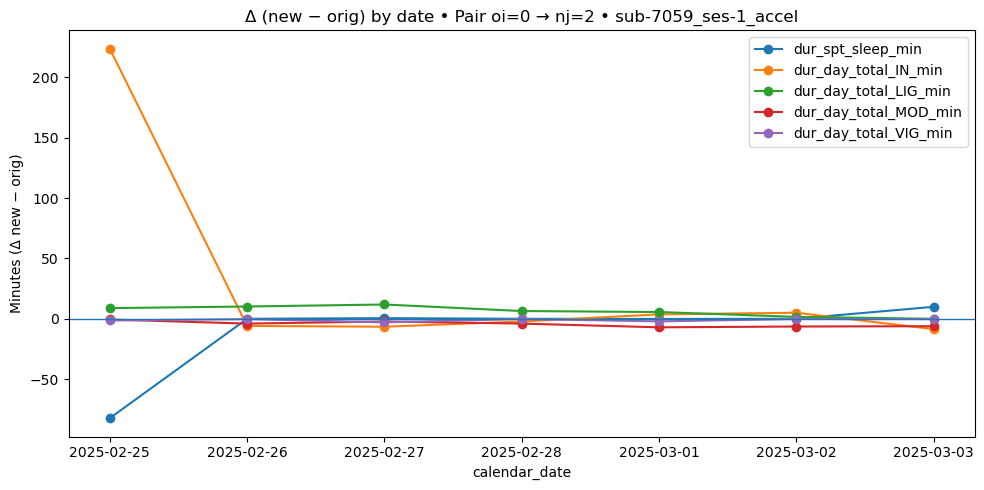

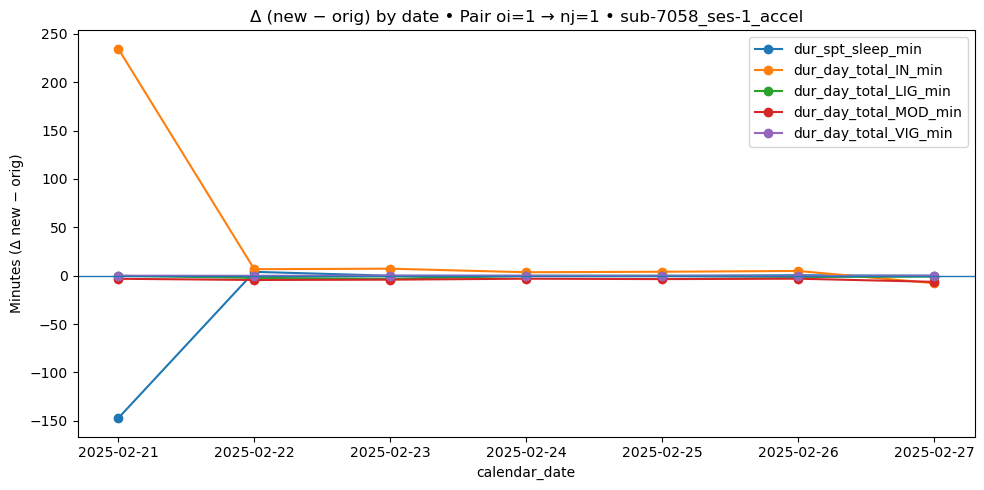

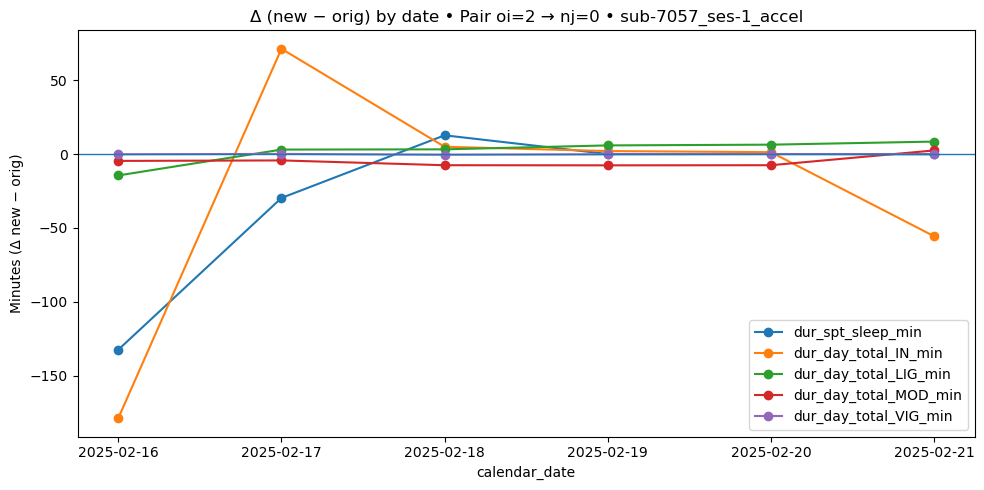

[done] Created 3 plot(s).


In [27]:

# metrics to compare
DUR_COLS = [
    "dur_spt_sleep_min",
    "dur_day_total_IN_min",
    "dur_day_total_LIG_min",
    "dur_day_total_MOD_min",
    "dur_day_total_VIG_min",
]
def plot_dur_differences(pairs, outdir=None, show=True):
    """
    pairs: list of ((orig_idx, filtered_orig_df), (new_idx, filtered_new_df))
           as returned by pair_and_filter_unordered(...)
    outdir: optional directory to save PNGs. If None, files aren't saved.
    show: whether to plt.show() each figure.
    """
    if outdir:
        os.makedirs(outdir, exist_ok=True)

    made = 0
    for (oi, fo), (nj, fn) in pairs:
        if fo.empty or fn.empty:
            print(f"[skip] Empty filtered DataFrame for pair oi={oi}, nj={nj}")
            continue

        # Merge the two filtered views back together on keys
        merged = pd.merge(
            fo, fn,
            on=["ID", "calendar_date"],
            how="inner",
            suffixes=("_orig", "_new")
        )
        if merged.empty:
            print(f"[skip] Inner merge empty for pair oi={oi}, nj={nj}")
            continue

        # Ensure datetime + sort
        merged["calendar_date"] = pd.to_datetime(merged["calendar_date"], errors="coerce")
        merged = merged.dropna(subset=["calendar_date"]).sort_values("calendar_date")

        # Build a tidy delta frame: date index, columns = metrics, values = (new - orig)
        delta = pd.DataFrame({"calendar_date": merged["calendar_date"].values})
        for col in DUR_COLS:
            ocol = f"{col}_orig"
            ncol = f"{col}_new"
            # if a metric is missing on either side, fill with NaN to avoid KeyError
            if ocol not in merged.columns or ncol not in merged.columns:
                delta[col] = pd.NA
            else:
                delta[col] = merged[ncol] - merged[ocol]
        delta = delta.set_index("calendar_date")

        # Figure title bits
        ids = merged["ID"].dropna().unique().tolist()
        id_label = ids[0] if len(ids) == 1 else f"{len(ids)} IDs"
        title = f"Δ (new − orig) by date • Pair oi={oi} → nj={nj} • {id_label}"

        # Plot — one chart per pair, multiple lines (one per metric)
        plt.figure(figsize=(10, 5))
        for col in DUR_COLS:
            if col in delta.columns:
                # Let matplotlib choose default styles/colors; don't specify colors.
                plt.plot(delta.index, delta[col], marker="o", label=col)

        plt.axhline(0, linewidth=1)
        plt.title(title)
        plt.xlabel("calendar_date")
        plt.ylabel("Minutes (Δ new − orig)")
        plt.legend()
        plt.tight_layout()
        plt.

        # Save if requested
        if outdir:
            # Safe filename: include oi, nj, and (optionally) single ID
            safe_id = ids[0] if len(ids) == 1 else "multi"
            fname = f"pair_{oi}_to_{nj}_{safe_id}.png"
            path = os.path.join(outdir, fname)
            plt.savefig(path, dpi=150)
            print(f"[saved] {path}")

        if show:
            plt.show()
        else:
            plt.close()

        made += 1

    print(f"[done] Created {made} plot(s).")

# Example usage:
plot_dur_differences(paired_dfs, show=True)

In [29]:
actilife5097 = pd.read_csv("/mnt/rdss/VossLab/Repositories/Accelerometer_Data/Test/1191_2-15-2025_Activity.xlsx/1191_2-15-2025_Activity_DailyDetailed.csv")
actilife5097

,Subject,Filename,Epoch,Weight (lbs),Age,Gender,Date,Day of Week,Day of Week Num,Number of Freedson (1998) Bouts occurring in this day,...,Vector Magnitude CPM,Steps Counts,Steps Average Counts,Steps Max Counts,Steps Per Minute,Lux Average Counts,Lux Max Counts,Number of Epochs,Time,Calendar Days
0,1191,1191 (2025-02-15)60sec.agd,60,0,28,F,2/15/2025,Saturday,6,0,...,352.3,73,1.9,19,1.9,0,0,39,39,1
1,1191,1191 (2025-02-15)60sec.agd,60,0,28,F,2/16/2025,Sunday,7,7,...,2031.1,8858,9.7,91,9.7,0,0,909,909,1
2,1191,1191 (2025-02-15)60sec.agd,60,0,28,F,2/17/2025,Monday,1,7,...,1456.1,12638,8.8,107,8.8,0,0,1440,1440,1
3,1191,1191 (2025-02-15)60sec.agd,60,0,28,F,2/18/2025,Tuesday,2,11,...,1409.5,13256,9.3,84,9.3,0,0,1422,1422,1
4,1191,1191 (2025-02-15)60sec.agd,60,0,28,F,2/19/2025,Wednesday,3,9,...,1282.0,12714,8.9,99,8.9,0,0,1429,1429,1
5,1191,1191 (2025-02-15)60sec.agd,60,0,28,F,2/20/2025,Thursday,4,11,...,1448.8,12742,9.0,95,9.0,0,0,1410,1410,1
6,1191,1191 (2025-02-15)60sec.agd,60,0,28,F,2/21/2025,Friday,5,8,...,1376.3,11198,7.8,107,7.8,0,0,1440,1440,1


In [30]:
actilife5097.columns

Index(['Subject', 'Filename', 'Epoch', 'Weight (lbs)', 'Age', 'Gender', 'Date',
       'Day of Week', 'Day of Week Num',
       'Number of Freedson (1998) Bouts occurring in this day',
       'Number of Freedson (1998) Bouts starting in this day',
       'Number of Freedson (1998) Bouts ending in this day',
       'Total time of Freedson (1998) Bouts occurring in this day',
       'Total activity counts of Freedson (1998) Bouts occurring in this day',
       'Number of Sedentary Bouts occurring in this day',
       'Number of Sedentary Bouts starting in this day',
       'Number of Sedentary Bouts ending in this day',
       'Total time of Sedentary Bouts occurring in this day',
       'Number of Sedentary Breaks occurring in this day',
       'Number of Sedentary Breaks starting in this day',
       'Number of Sedentary Breaks ending in this day',
       'Total time of Sedentary Breaks occurring in this day', 'Sedentary',
       'Light', 'Moderate', 'Vigorous', 'Very Vigorous', '% in 

In [31]:
actilife_columns = ['Sedentary', 'Light', 'Moderate', 'Vigorous', 'Very Vigorous']
actilife5097 = actilife5097[actilife_columns]
actilife5097

,Sedentary,Light,Moderate,Vigorous,Very Vigorous
0,32,7,0,0,0
1,323,464,122,0,0
2,742,556,142,0,0
3,828,417,177,0,0
4,784,502,143,0,0
5,743,500,167,0,0
6,804,494,142,0,0
